# Zestaw zadań 1: Rozkłady zmiennych losowych dyskretnych

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt


### Funkcje do wykorzystania

In [8]:
def vizualize_discrete_distribution(pmf, cdf, mask=None):
    """
    Parameters
    -------
    pmf: pandas.DataFrame
        Tablica zawierająca indeks z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. X) oraz pojedynczą kolumnę
        z prawdopodobieństwami poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. P(X)).
    cdf: pandas.DataFrame
        Tablica zawierająca index w formacie pandas.IntervalIndex z przedziałami wartości zmiennej losowej i nadaną nazwą zmiennej (np. X)
        oraz pojedynczą kolumnę wartościami dystrybuanty dla poszczególnych przedziałów o nadanej nazwie bazującej na nazwie zmiennej (np. F(X)).
    mask: numpy.ndarray
        Macierz logiczna 1D określająca, które z wariantów zmiennej losowej spełniają wizualizowaną nierówność, a które nie.
    """

    pmf_name = pmf.columns[0]
    pmf_plot = pmf.copy(deep=True)
    
    cdf_name = cdf.columns[0]
    cdf_index = cdf.index.copy(deep=True)
    cdf_index_range = cdf.index[-1].left - cdf.index[0].right
    cdf_index.values[0] = pd.Interval(cdf.index[0].right - 0.1*cdf_index_range, cdf.index[0].right, closed=cdf.index.closed)
    cdf_index.values[-1] = pd.Interval(cdf.index[-1].left, cdf.index[-1].left + 0.1*cdf_index_range, closed=cdf.index.closed)
    cdf_plot = pd.DataFrame(data=cdf.values, index=cdf_index, columns=[cdf_name])
    cdf_plot.index.name = cdf.index.name
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), facecolor='white')

    fig.suptitle("Rozkład prawdopodobieństwa i dystrybuanta zmiennej losowej dyskretnej")

    if mask is None:
        axes[0].scatter(pmf.index, pmf_plot[pmf_name], color="blue")
        axes[0].vlines(pmf.index, 0, pmf_plot[pmf_name], color="blue")
    else:
        axes[0].scatter(pmf.index[~mask], pmf_plot[pmf_name][~mask], color="red")
        axes[0].scatter(pmf.index[mask], pmf_plot[pmf_name][mask], color="green")
        axes[0].vlines(pmf.index[~mask], 0, pmf_plot[pmf_name][~mask], color="red")
        axes[0].vlines(pmf.index[mask], 0, pmf_plot[pmf_name][mask], color="green")
    axes[0].set_title("Rozkład prawdopodobieństwa")
    axes[0].set_xlabel(pmf_plot.index.name)
    axes[0].set_ylabel(pmf_name)

    axes[1].hlines(cdf_plot[cdf_name], cdf_plot.index.left, cdf_plot.index.right, color="grey")
    axes[1].scatter(cdf_plot.index.left[1:], cdf_plot[cdf_name][1:], color="grey")
    axes[1].scatter(cdf_plot.index.right[:-1], cdf_plot[cdf_name][:-1], color='white', edgecolor="grey")
    axes[1].set_title("Dystrybuanta")
    axes[1].set_xlabel(cdf_plot.index.name)
    axes[1].set_ylabel(cdf_name)

### Zadanie 1: Przykładowy dyskretny rozkład prawdopodobieństwa [10 pkt]
Zmienna losowa X ma funkcję rozkładu prawdopodobieństwa daną wzorem:

$$P(X) = \begin{cases}
0.1\text{ dla }x=1\\
0.05\text{ dla }x=3\\
0.15\text{ dla }x=5\\
0.25\text{ dla }x=7\\
0.2\text{ dla }x=9\\
0.15\text{ dla }x=11\\
0.1\text{ dla }x=13\\
\end{cases}$$

#### a) Funkcja rozkładu prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej X w formie tablicy `r1p` o następującej strukturze:

> Indeks:</br>
> X - warianty przyjmowane przez zmienną X.</br>

> Kolumny:</br>
> P(X) - prawdopodobieństwo poszczególnych wariantów.

In [12]:
r_variants = np.array([1,3,5,7,9,11,13])
r_variants
r_probabilities = np.array([0.1, 0.05,0.15,0.25,0.2,0.15,0.1])
r_probabilities
r1p = pd.DataFrame(data=r_probabilities, index=r_variants, columns=["P(X)"])
r1p.index.name = 'X'

r1p["P(X)"]


X
1     0.10
3     0.05
5     0.15
7     0.25
9     0.20
11    0.15
13    0.10
Name: P(X), dtype: float64

In [10]:
# Komórka testowa
assert type(r1p) == pd.DataFrame
assert r1p.shape == (7, 1)
assert list(r1p.columns) == ["P(X)"]
assert r1p.index.name == 'X'
assert np.isclose(np.sum(r1p.index.values), 49)
assert np.isclose(np.sum(r1p["P(X)"]), 1)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej X w formie tablicy `r1f` o następującej strukturze:

> Indeks:</br>
> X - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(X) -wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.

In [77]:
breaks = np.hstack([-np.inf, r1p.index, np.inf])
r1_intervals = pd.IntervalIndex.from_breaks(breaks, closed="left")
r1_cumulative_probabilities = np.cumsum(r1p["P(X)"].values)
r1_cumulative_probabilities = np.hstack([0, r1_cumulative_probabilities])
r1f = pd.DataFrame(data = r1_cumulative_probabilities, index = r1_intervals, columns=["F(X)"])
r1f.index.name = 'X'
r1f

,F(X)
X,
"[-inf, 1.0)",0.00
"[1.0, 3.0)",0.10
"[3.0, 5.0)",0.15
"[5.0, 7.0)",0.30
"[7.0, 9.0)",0.55
"[9.0, 11.0)",0.75
"[11.0, 13.0)",0.90
"[13.0, inf)",1.00


In [78]:
# Komórka testowa
assert type(r1f) == pd.DataFrame
assert r1f.shape == (8, 1)
assert list(r1f.columns) == ["F(X)"]
assert r1f.index.name == 'X'
assert type(r1f.index) == pd.core.indexes.interval.IntervalIndex
assert r1f.index.closed == 'left'
assert np.isclose(r1f["F(X)"].min(), 0.0)
assert np.isclose(r1f["F(X)"].max(), 1.0)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej X w formie wykresów.

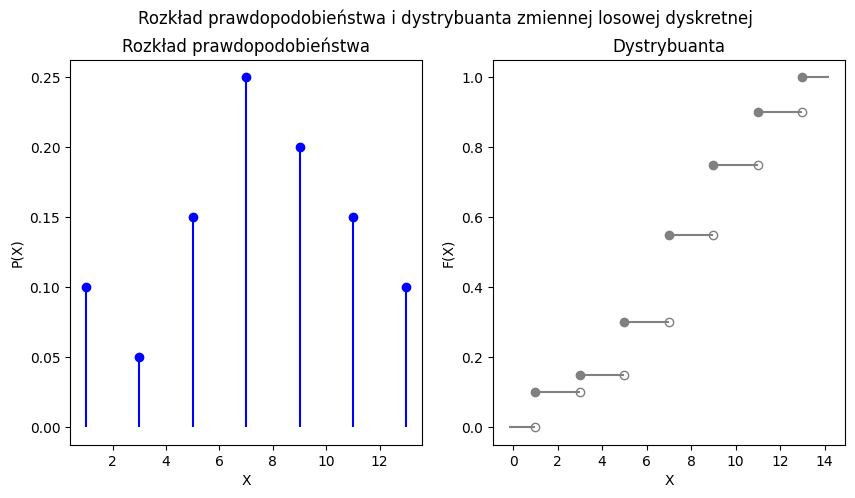

In [79]:
vizualize_discrete_distribution(r1p, r1f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej X - wartość średnia (`r1_mean`), wariancja (`r1_var`) i odchylenie standardowe (`r1_std`).

In [80]:
r1_mean = np.sum(r1p.index * r1p["P(X)"] )
r1_mean

7.499999999999999

In [46]:
r1_var = np.sum( ( (r1p.index - r1_mean ) ** 2 ) * r1p["P(X)"] )
r1_var


11.55

In [47]:
r1_std = np.sqrt(r1_var)
r1_std

3.398529093593286

In [48]:
# Komórka testowa
assert np.isclose(r1_mean, 7.499999999999999)
assert np.isclose(r1_var, 11.55)
assert np.isclose(r1_std, 3.398529093593286)

### Zadanie 2: Rozkład dwumianowy [10 pkt]

Zmienna losowa Y ma rozkład dwumianowy z prawdopodobieństwem sukcesu $p=0.5$ i liczbą doświadczeń $n=10$.

#### a) Rozkład prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej Y w formie tablicy `r2p` o następującej strukturze:

> Indeks:</br>
> Y - warianty przyjmowane przez zmienną Y.</br>

> Kolumny:</br>
> P(Y) - prawdopodobieństwo poszczególnych wariantów.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną Y wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości prawdopodobieństwa poszczególnych wariantów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [14]:
r_variants = np.arange(0,11,1)
r_variants
n=10
p=0.5
r_probabilities = sp.stats.binom.pmf(r_variants, n, p)
r_probabilities
r2p = pd.DataFrame(data=r_probabilities, index=r_variants, columns=["P(Y)"])
r2p.index.name = 'Y'

r_probabilities

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507812,
       0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

In [50]:
# Komórka testowa
assert type(r2p) == pd.DataFrame
assert r2p.shape == (11, 1)
assert list(r2p.columns) == ["P(Y)"]
assert r2p.index.name == 'Y'
assert np.isclose(np.sum(r2p.index.values), 55)
assert np.isclose(np.sum(r2p["P(Y)"]), 1.0)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej Y w formie tablicy `r2f` o następującej strukturze:

> Indeks:</br>
>  Y - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(Y) - wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.
 - Wartości prawdopodobieństwa poszczególnych przedziałów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [51]:
breaks = np.hstack([-np.inf, r2p.index, np.inf])
r2_intervals = pd.IntervalIndex.from_breaks(breaks, closed="left")
r2_cumulative_probabilities = np.cumsum(r2p["P(Y)"].values)
r2_cumulative_probabilities = np.hstack([0, r2_cumulative_probabilities])
r2f = pd.DataFrame(data = r2_cumulative_probabilities, index = r2_intervals, columns=["F(Y)"])
r2f.index.name = 'Y'
r2f

,F(Y)
Y,
"[-inf, 0.0)",0.000000
"[0.0, 1.0)",0.000977
"[1.0, 2.0)",0.010742
"[2.0, 3.0)",0.054688
"[3.0, 4.0)",0.171875
"[4.0, 5.0)",0.376953
"[5.0, 6.0)",0.623047
"[6.0, 7.0)",0.828125
"[7.0, 8.0)",0.945312


In [52]:
# Komórka testowa
assert type(r2f) == pd.DataFrame
assert r2f.shape == (12, 1)
assert list(r2f.columns) == ["F(Y)"]
assert r2f.index.name == 'Y'
assert type(r2f.index) == pd.core.indexes.interval.IntervalIndex
assert r2f.index.closed == 'left'
assert np.isclose(r2f["F(Y)"].min(), 0.0)
assert np.isclose(r2f["F(Y)"].max(), 1.0)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej Y w formie wykresów.

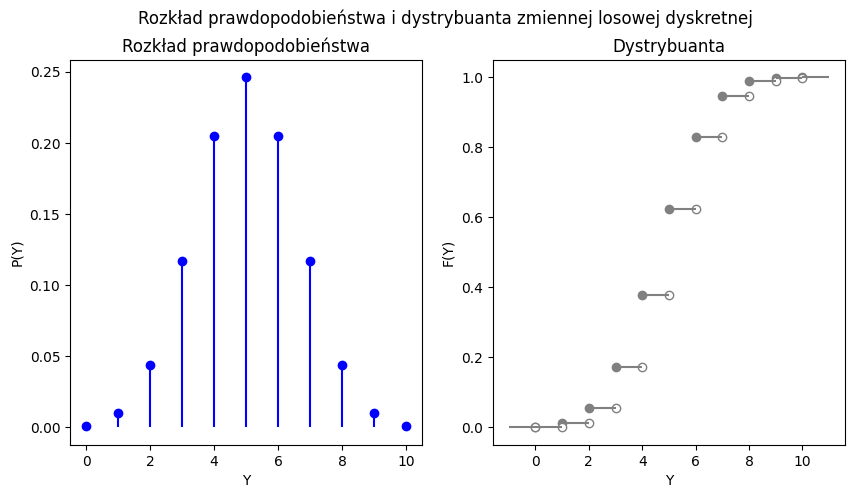

In [53]:
vizualize_discrete_distribution(r2p, r2f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej Y - wartość średnia (`r2_mean`), wariancja(`r2_var`) i odchylenie standardowe (`r2_std`).

Uwagi do wykonania zadania:
 - Wartości poszczególnych parametrów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.binom`.

In [54]:
r2_mean = sp.stats.binom.mean(n , p)
r2_mean

5.0

In [55]:
r2_var = sp.stats.binom.var(n, p)
r2_var

2.5

In [56]:
r2_std = np.sqrt(r2_var)
r2_std

1.5811388300841898

In [57]:
# Komórka testowa
assert np.isclose(r2_mean, 5.0)
assert np.isclose(r2_var, 2.5)
assert np.isclose(r2_std, 1.5811388300841898)

### Zadanie 3: Rozkład Poissona [10 pkt]

Zmienna losowa Z ma rozkład Poissona z parametrem $\lambda=15$.

#### a) Rozkład prawdopodobieństwa w formie tabelarycznej

Przedstaw funkcję rozkładu prawdopodobieństwa zmiennej losowej Z w formie tablicy `r3p` o następującej strukturze:

> Indeks:</br>
> Z - warianty przyjmowane przez zmienną Z.</br>

> Kolumny:</br>
> P(Z) - prawdopodobieństwo poszczególnych wariantów.

W tablicy zawrzyj tylko warianty zmiennej losowej Z od 0 do wartości przy której suma prawdopodobieństw uwzględnionych wariantów przekracza 0.9999.

Uwagi do wykonania zadania:
 - Warianty przyjmowane przez zmienną Z wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości prawdopodobieństwa poszczególnych wariantów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [21]:
lambda1 = 15 
tab = np.arange(0,1000)
values1 = sp.stats.poisson.pmf(tab, lambda1)
sum_p = 0
index = 0

cumulative_sum = np.cumsum(values1)

index_do_1 = np.argmax(cumulative_sum > 0.9999) + 1


r3 = np.arange(0, index_do_1)
values2 = sp.stats.poisson.pmf(r3, lambda1)

r3p = pd.DataFrame(data=values2, index=r3, columns=["P(Z)"])
r3p.index.name = 'Z'
cumulative_sum


array([3.05902321e-07, 4.89443713e-06, 3.93084482e-05, 2.11378503e-04,
       8.56641211e-04, 2.79242933e-03, 7.63189964e-03, 1.80021931e-02,
       3.74464935e-02, 6.98536607e-02, 1.18464412e-01, 1.84751799e-01,
       2.67611033e-01, 3.63217842e-01, 4.65653709e-01, 5.68089576e-01,
       6.64123201e-01, 7.48858752e-01, 8.19471712e-01, 8.75218785e-01,
       9.17029090e-01, 9.46893594e-01, 9.67255755e-01, 9.80535426e-01,
       9.88835220e-01, 9.93815096e-01, 9.96688102e-01, 9.98284216e-01,
       9.99139277e-01, 9.99581550e-01, 9.99802687e-01, 9.99909688e-01,
       9.99959845e-01, 9.99982644e-01, 9.99992702e-01, 9.99997013e-01,
       9.99998809e-01, 9.99999537e-01, 9.99999825e-01, 9.99999935e-01,
       9.99999977e-01, 9.99999992e-01, 9.99999997e-01, 9.99999999e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [22]:
# Komórka testowa
assert type(r3p) == pd.DataFrame
assert r3p.shape == (32, 1)
assert list(r3p.columns) == ["P(Z)"]
assert r3p.index.name == 'Z'
assert np.isclose(np.sum(r3p.index.values), 496)
assert np.isclose(np.sum(r3p["P(Z)"]), 0.9999)

#### b) Dystrybuanta w formie tabelarycznej

Przedstaw dystrybuantę zmiennej losowej Z w formie tablicy `r3f` o następującej strukturze:

> Indeks:</br>
> Z - przedziały, w których wartość dystrybuanty jest stała przedstawione jako `pandas.IntervalIndex`.</br>

> Kolumny:</br>
> F(Z) - wartości dystrybuanty wyliczone dla poszczególnych przedziałów.

Uwagi do wykonania zadania:
 - Przedziały wartości zdefiniuj jako `pandas.IntervalIndex` za pomocą jednej z metod tej klasy  -  `from_array()`, `from_tuples()` lub `from_breaks()`.
 - Wartości prawdopodobieństwa poszczególnych przedziałów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [60]:
breaks = np.hstack([-np.inf, r3p.index, np.inf])
r2_intervals = pd.IntervalIndex.from_breaks(breaks, closed="left")
r2_cumulative_probabilities = np.cumsum(r3p["P(Z)"].values)
r2_cumulative_probabilities = np.hstack([0, r2_cumulative_probabilities])
r3f = pd.DataFrame(data = r2_cumulative_probabilities, index = r2_intervals, columns=["F(Z)"])
r3f.index.name = 'Z'
r3f

,F(Z)
Z,
"[-inf, 0.0)",0.000000e+00
"[0.0, 1.0)",3.059023e-07
"[1.0, 2.0)",4.894437e-06
"[2.0, 3.0)",3.930845e-05
"[3.0, 4.0)",2.113785e-04
"[4.0, 5.0)",8.566412e-04
"[5.0, 6.0)",2.792429e-03
"[6.0, 7.0)",7.631900e-03
"[7.0, 8.0)",1.800219e-02


In [61]:
# Komórka testowa
assert type(r3f) == pd.DataFrame
assert r3f.shape == (33, 1)
assert list(r3f.columns) == ["F(Z)"]
assert r3f.index.name == 'Z'
assert type(r3f.index) == pd.core.indexes.interval.IntervalIndex
assert r3f.index.closed == 'left'
assert np.isclose(r3f["F(Z)"].min(), 0.0)
assert np.isclose(r3f["F(Z)"].max(), 0.9999)

#### c) Wizualizacja rozkładu prawdopodobieństwa i dystrybuanty

Wykorzystaj funkcję `vizualize_discrete_distribution()` do przedstawienia rozkładu prawdopodobieństwa oraz dystrybuanty rozkładu zmiennej losowej Z w formie wykresów.

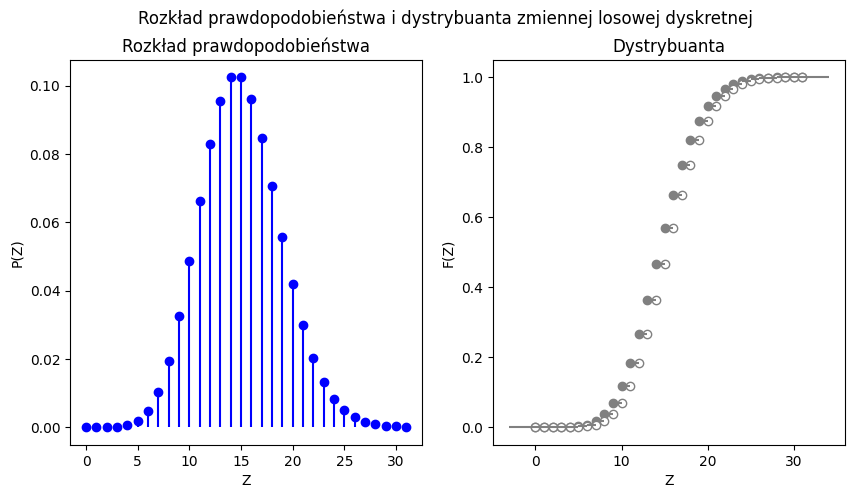

In [62]:
vizualize_discrete_distribution(r3p, r3f)

#### d) Podstawowe parametry rozkładu

Oblicz i zapisz do zmiennych następujące parametry rozkładu zmiennej losowej Z - wartość średnia (`r3_mean`), wariancja(`r3_var`) i odchylenie standardowe (`r3_std`).

Uwagi do wykonania zadania:
 - Wartości poszczególnych parametrów oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.poisson`.

In [63]:
r3_mean = sp.stats.poisson.mean(lambda1)

In [64]:
r3_var = sp.stats.poisson.var(lambda1)

In [65]:
r3_std = np.sqrt(lambda1)

In [66]:
# Komórka testowa
assert np.isclose(r3_mean, 15.0)
assert np.isclose(r3_var, 15.0)
assert np.isclose(r3_std, 3.872983346207417)

### Zadanie 4: Obliczanie i wizualizacja prawdopodobieństw [6 pkt]
Oblicz i przedstaw na wykresach następujące prawdopodobieństwa:
- P(X>5)
- P(1<Y<=6)
- P(Z<=12 | Z>21)

Wyniki zapisz kolejno do zmiennych `p1`, `p2` i `p3` oraz przedstaw na wykresach korzystając z funkcji `vizualize_discrete_distribution()`.

#### a) P(X>5)

In [1]:
mask_1 = np.all([r1p.index > 5], axis=0)
vizualize_discrete_distribution(r1p, r1f, mask_1)
p1 = np.sum(r1p[r1p.index > 5])
print(p1)

NameError: name 'np' is not defined

In [68]:
# Komórka testowa
assert np.isclose(p1, 0.7)

#### b) P(1<Y<=6)

P(Y)    0.817383
dtype: float64


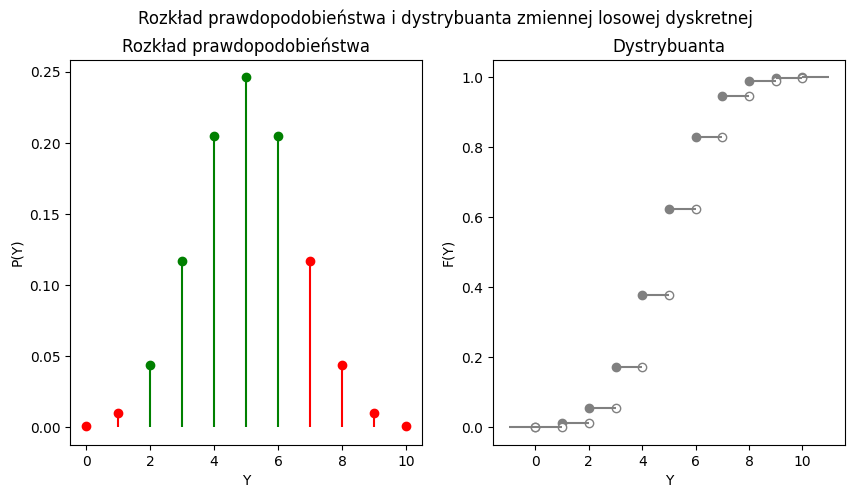

In [69]:

# r_2_f = r2f[(r2f.index.left > 1) & (r2f.index.right <= 6)]
mask_2 = np.all([r2p.index > 1.0 , r2p.index <= 6.0], axis=0)
vizualize_discrete_distribution(r2p, r2f, mask_2)
p2 = np.sum( r2p[(r2p.index > 1) & (r2p.index <= 6)])
print(p2)

In [70]:
# Komórka testowa
assert np.isclose(p2, 0.8173828125)

#### c) P(Z<=12 | Z>21)

P(Z)    0.320717
dtype: float64


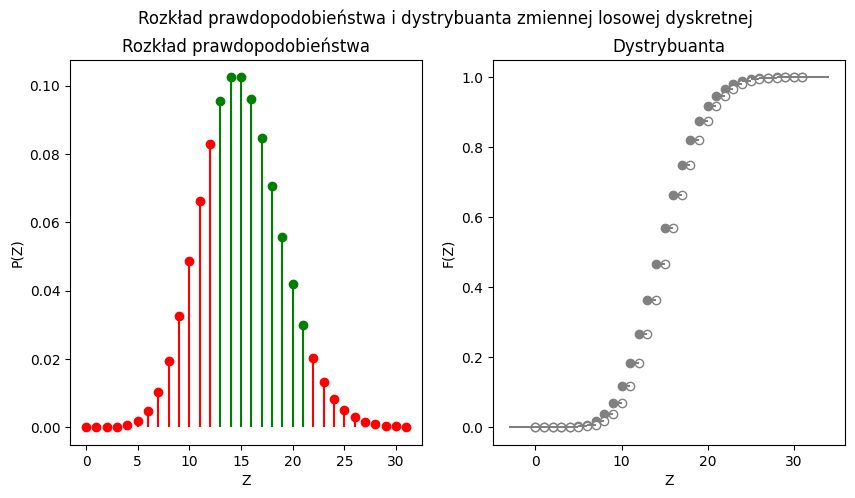

In [71]:

# r_3_f = r3f[(r3f.index.left <= 12) | (r3f.index.right > 21)]

mask_3 = np.all([r3p.index > 12.0, r3p.index <= 21.0], axis=0)

p3 = 1 - np.sum(r3p[(r3p.index > 12) & (r3p.index <= 21)])
print(p3)
vizualize_discrete_distribution(r3p, r3f, mask_3)

In [72]:
# Komórka testowa
assert np.isclose(p3, 0.32071743985184814)